In [158]:
from __future__ import annotations

import math
import matplotlib.pyplot as plt
import numpy as np

In [174]:
def get_scanpath_of_single_file(fixation_list):
    scanpath = []
    for i in range(len(fixation_list)):
        frame_no = fixation_list[i][0][6]
        # x_dva_sum = np.sum(fixation_list[i][:, 0])
        # y_dva_sum = np.sum(fixation_list[i][:, 1])
        #
        # x_dva_avg = x_dva_sum / len(fixation_list[i])
        # y_dva_avg = y_dva_sum / len(fixation_list[i])
        # scanpath.append([int(frame_no), x_dva_avg, y_dva_avg])
        scanpath.append([int(frame_no), fixation_list[i][5][0], fixation_list[i][5][1]])

    return np.array(scanpath)


def dva_to_vel(vector):
    vel = np.array(vector[1:]) - np.array(vector[0:-1])
    vel = np.array([0] + list(vel))
    return vel

# def compute_velocity(x_dva, sampling_rate=100):
#     time_step = 1 / sampling_rate  # Calculate the time step
#     velocities = [(x_dva[i] - x_dva[i - 1]) / time_step for i in range(1, len(x_dva))]
#     return np.array(velocities)

def check_right_edge(x1, x0):
    x_diff = x1 - x0
    if x1 > 90 and x0 < -90:
        x_diff = 180 - x1 + (-180 - x0)
    elif x1 < -90 and x0 > 90:
        x_diff = (-180 - x1) + (180 - x0)
    return x_diff
        
def compute_velocity(x_dva, y_dva, sampling_rate=100.0):
    time_step = 1 / sampling_rate  # Calculate the time step
    x_vel = []
    y_vel = []
    for i in range(1, len(x_dva)):
        # x_diff = x_dva[i] - x_dva[i - 1]
        x_diff = check_right_edge(x_dva[i], x_dva[i - 1])
        y_diff = y_dva[i] - y_dva[i - 1]
        
        # approach 1
        # x_diff = min(8, x_diff)
        # x_diff = max(-8, x_diff)
        # 
        # y_diff = min(8, y_diff)
        # y_diff = max(-8, y_diff)
        
        # TODO check why 2 spikes
        # also clip velocity 

        x_vel.append(x_diff / time_step)
        y_vel.append(y_diff / time_step)
        
        # if abs(x_diff) <= 75 and abs(y_diff) <= 75:
        #     x_vel.append(x_diff / time_step)
        #     y_vel.append(y_diff / time_step)
        
        # approach 2
        # if abs(x_diff) <= 75 and abs(y_diff) <= 75:
        #     x_vel.append(x_diff / time_step)
        #     y_vel.append(y_diff / time_step)
        
        # approach 3
        # if abs(x_diff) <= 75 and abs(y_diff) <= 75:
        #     x_vel.append(x_diff / time_step)
        #     y_vel.append(y_diff / time_step)
        # else:
        #     # edge cross case. HiW big shift, however no shift in GiW
        #     x_diff = x_dva[i] + x_dva[i - 1]
        #     y_diff = y_dva[i] + y_dva[i - 1]
        #     x_diff = 0
        #     y_diff = 0
        #     x_vel.append(x_diff / time_step)
        #     y_vel.append(y_diff / time_step)
    return np.array(x_vel), np.array(y_vel)


def total_velocity_magnitude(vel_x, vel_y):
    vel_x_squared = vel_x ** 2
    vel_y_squared = vel_y ** 2
    magnitude_squared = vel_x_squared + vel_y_squared
    magnitude = np.sqrt(magnitude_squared)
    magnitude = max(magnitude, 800)
    return magnitude

def ScreenCoord2AngularCoord(ScreenCoord):
    # Inverse transformation of screen coords (0-1) to angular coords (degrees).

    # Parameters of the Hmd (HTC Vive).
    # Vertical FOV.
    VerticalFov = math.pi * 110 / 180
    # Size of a half screen.
    ScreenWidth = 1080
    ScreenHeight = 1200
    # The pixel distance between the eye and the screen center.
    ScreenDist = 0.5 * ScreenHeight / math.tan(VerticalFov / 2)

    AngularCoord = np.zeros(2)

    # The X coord.
    AngularCoord[0] = (math.atan((ScreenCoord[0] - 0.5) * ScreenWidth / ScreenDist) * 180) / math.pi
    # The Y coord.
    AngularCoord[1] = (math.atan((ScreenCoord[1] - 0.5) * ScreenHeight / ScreenDist) * 180) / math.pi

    return AngularCoord

In [175]:
data_path = '../data/EHTaskDataset/RawData/User_07_Video_06_Task_1.txt'

giw_x_vals = []
giw_y_vals = []
hiw_x_vals = []
hiw_y_vals = []
eih_x_vals = []
eih_y_vals = []

with open(data_path, 'r') as file:
    for line in file:
        values = line.split()

        giw_x_vals.append(float(values[6]))
        giw_y_vals.append(float(values[7]))

        hiw_x_vals.append(float(values[2]))
        hiw_y_vals.append(float(values[3]))

        eih_dvas = ScreenCoord2AngularCoord([float(values[4]), float(values[5])])

        eih_x_vals.append(eih_dvas[0])
        eih_y_vals.append(eih_dvas[1])

# index1 = [i for i, x in enumerate(giw_x_vals) if x == x_dva[100]]
# index2 = [i for i, x in enumerate(giw_x_vals) if x == x_dva[101]]
# 
# if len(index1) == 0:
#     raise "index1 not found"
# if len(index2) == 0:
#     raise "index2 not found"
# 
# print(index1)
# print(index2)
# 
# giw_x_vals = giw_x_vals[index1[0]:index2[0] + 1]
# giw_y_vals = giw_y_vals[index1[0]:index2[0] + 1]
# hiw_x_vals = hiw_x_vals[index1[0]:index2[0] + 1]
# hiw_y_vals = hiw_y_vals[index1[0]:index2[0] + 1]
# eih_x_vals = eih_x_vals[index1[0]:index2[0] + 1]
# eih_y_vals = eih_y_vals[index1[0]:index2[0] + 1]
# 
# print('x_vals len', len(x_vals))
print('giw_x_vals len', len(giw_x_vals))

giw_x_vel, giw_y_vel = compute_velocity(np.array(giw_x_vals), np.array(giw_y_vals))
hiw_x_vel, hiw_y_vel = compute_velocity(np.array(hiw_x_vals), np.array(hiw_y_vals))
eih_x_vel, eih_y_vel = compute_velocity(np.array(eih_x_vals), np.array(eih_y_vals))

# target_vel = total_velocity_magnitude(x_vel, y_vel)
giw_vel = total_velocity_magnitude(giw_x_vel, giw_y_vel)
hiw_vel = total_velocity_magnitude(hiw_x_vel, hiw_y_vel)
eih_vel = total_velocity_magnitude(eih_x_vel, eih_y_vel)

# giw_vel = giw_vel[1000:2000]
# hiw_vel = hiw_vel[1000:2000]
# eih_vel = eih_vel[1000:2000]

# giw_vel = giw_vel[100:200]
# hiw_vel = hiw_vel[100:200]
# eih_vel = eih_vel[100:200]

# print(target_vel.shape)
print(giw_vel.shape)
print(hiw_vel.shape)
print(eih_vel.shape)

# # Create the plot
# plt.figure(figsize=(8, 6))  # Set the figure size
# # plt.plot(range(len(target_vel)), target_vel, label='target_vel')
# # plt.plot(range(len(giw_vel)), giw_vel, label='giw_vel')
# plt.plot(range(len(hiw_x_vel)), hiw_x_vel, label='hiw_x_vel')
# # plt.plot(range(len(hiw_y_vel)), hiw_y_vel, label='hiw_y_vel')
# # plt.plot(range(len(hiw_y_vals)), hiw_y_vals, label='hiw_y_vals')
# plt.plot(range(len(hiw_x_vals)), hiw_x_vals, label='hiw_x_vals')
# # plt.plot(range(len(eih_vel)), eih_vel, label='eih_vel')
# 
# # Set plot title and labels
# plt.title('Velocity Plot')
# plt.xlabel('Time')
# plt.ylabel('Velocity')
# plt.legend()  # Show legend
# 

giw_x_vals len 14995


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

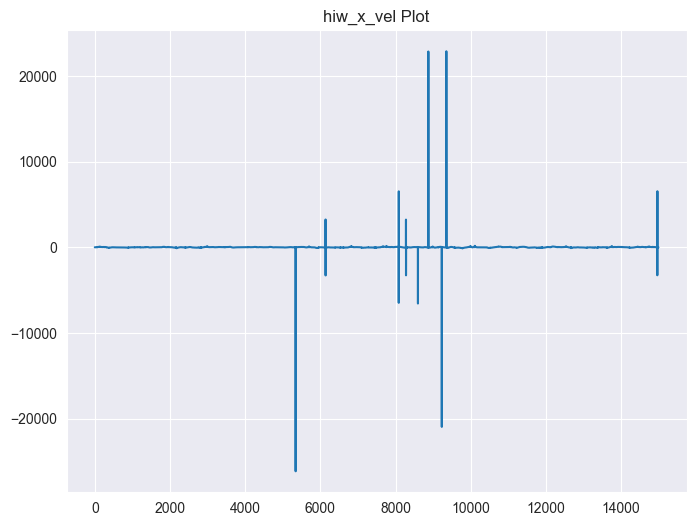

In [176]:
# # Create the plot
plt.figure(figsize=(8, 6))  # Set the figure size
# plt.plot(range(len(target_vel)), target_vel, label='target_vel')
# plt.plot(range(len(giw_vel)), giw_vel, label='giw_vel')
plt.title('hiw_x_vel Plot')
plt.plot(range(len(hiw_x_vel)), hiw_x_vel, label='hiw_x_vel')
# plt.plot(range(len(hiw_y_vel)), hiw_y_vel, label='hiw_y_vel')
# plt.plot(range(len(hiw_y_vals)), hiw_y_vals, label='hiw_y_vals')
# plt.plot(range(len(eih_vel)), eih_vel, label='eih_vel')

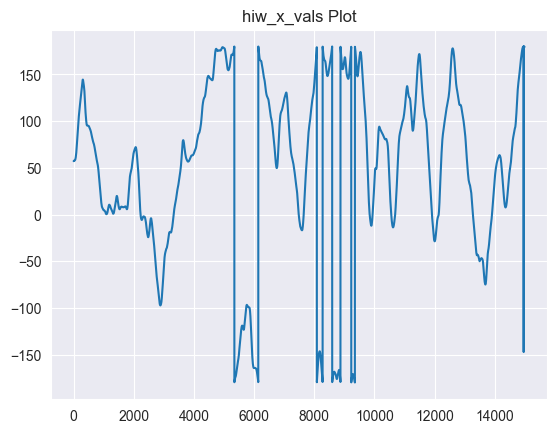

In [177]:
plt.title('hiw_x_vals Plot')
plt.plot(range(len(hiw_x_vals)), hiw_x_vals, label='hiw_x_vals')

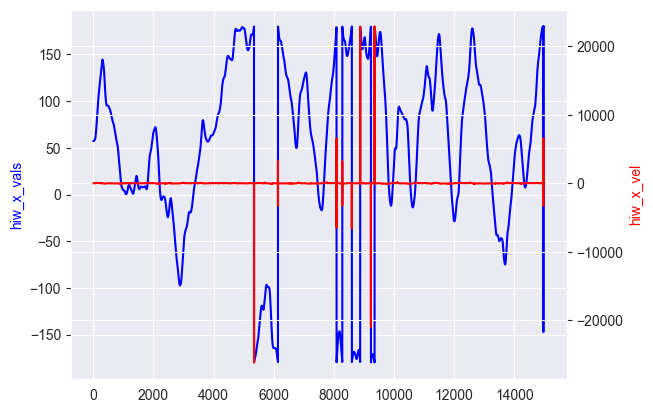

In [178]:
fig, ax1 = plt.subplots()

# Plot x_dva with the primary y-axis
ax1.plot(hiw_x_vals, color='blue', label='hiw_x_vals')
ax1.set_ylabel('hiw_x_vals', color='blue')

# Create a secondary y-axis for x_vel
ax2 = ax1.twinx()
ax2.plot(hiw_x_vel, color='red', label='hiw_x_vel')
ax2.set_ylabel('hiw_x_vel', color='red')

hiw_x_vel
plt.show()

# Show the plot (optional)
plt.show()

In [179]:
print('giw_vel', giw_vel.shape)
print('hiw_vel', hiw_vel.shape)
print('eih_vel', eih_vel.shape)

giw_vel (14994,)
hiw_vel (14994,)
eih_vel (14994,)


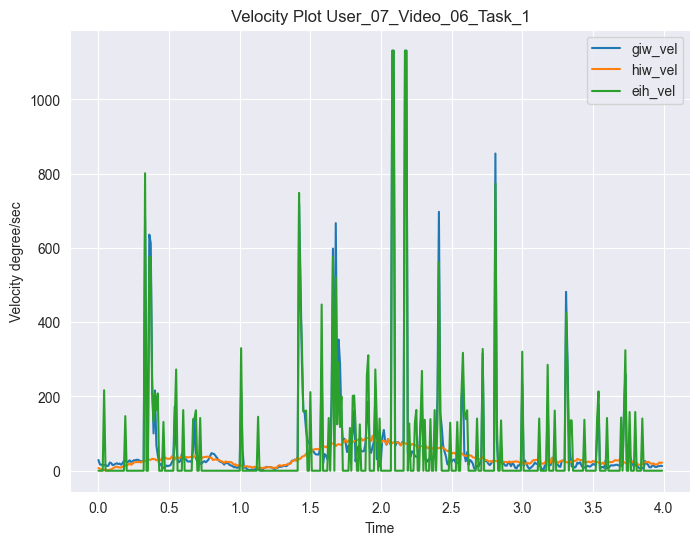

In [180]:
giw_v = giw_vel[12000:12400]
hiw_v = hiw_vel[12000:12400]
eih_v = eih_vel[12000:12400]

# Assuming time duration is 4 seconds with a step of 10 ms between each element
time_duration = 4  # seconds
sampling_rate = 100  # samples per second
time_steps = np.arange(len(hiw_v)) / sampling_rate  # time steps in seconds

plt.figure(figsize=(8, 6))  # Set the figure size
# plt.plot(range(len(target_vel)), target_vel, label='target_vel')
plt.plot(time_steps, giw_v, label='giw_vel')
# plt.plot(range(len(hiw_x_vel)), hiw_x_vel, label='hiw_x_vel')
plt.plot(time_steps, hiw_v, label='hiw_vel')
# plt.plot(range(len(eih_v)), eih_v, label='eih_vel')
# plt.plot(range(len(hiw_y_vals)), hiw_y_vals, label='hiw_y_vals')
plt.plot(time_steps, eih_v, label='eih_vel')

# Setting the x-axis ticks and labels for specific intervals (0, 0.5, 1, ..., 4 seconds)
plt.xticks(np.arange(0, time_duration + 0.5, 0.5))

# Set plot title and labels
plt.title('Velocity Plot User_07_Video_06_Task_1')
plt.xlabel('Time')
plt.ylabel('Velocity degree/sec')
plt.legend()  # Show legend

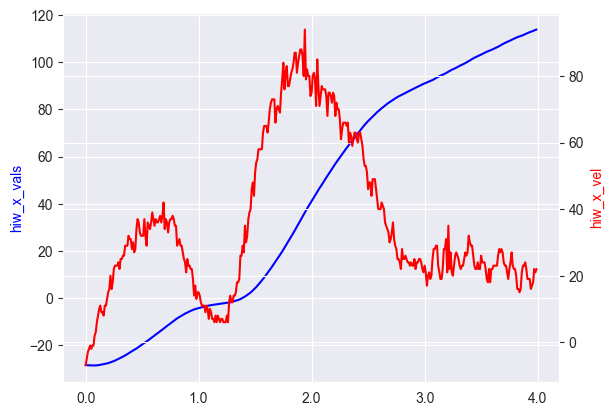

In [181]:
fig, ax1 = plt.subplots()

# Plot x_dva with the primary y-axis
ax1.plot(hiw_x_vals[12000:12400], color='blue', label='hiw_x_vals')
ax1.set_ylabel('hiw_x_vals', color='blue')

# Create a secondary y-axis for x_vel
ax2 = ax1.twinx()
ax2.plot(hiw_x_vel[12000:12400], color='red', label='hiw_x_vel')
ax2.set_ylabel('hiw_x_vel', color='red')
# ax2.set_xlabel('Time in s')


# Setting x-axis ticks and labels for specific intervals (0, 0.5, 1, ..., 4 seconds)
sampling_rate = 100  # samples per second
plt.xticks(np.arange(0, 401, 100), np.arange(0, 4.1, 1))

plt.show()